In [ ]:
pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 43kB/s 


In [ ]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

import keras_vggface

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-im_d3fvi
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-im_d3fvi
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=6cd1fec43df0ab1fa8975665697199bdba240e5e62f2a46a34da4ba2f7212bc0
  Stored in directory: /tmp/pip-ephem-wheel-cache-ewt2r6qj/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!tar -xf "/content/drive/My Drive/Colab Notebooks/fer_4_classes.tar.xz"

In [ ]:
import sys
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import io
import os 
import keras
import numpy as  np
import tensorflow as tf
import keras_vggface
from keras.utils import np_utils
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input,Dropout
from keras_vggface.vggface import VGGFace
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SIZE = 224
train_dir = "/content/4 classes fer/train"
valid_dir = "/content/4 classes fer/valid"
test_dir =  "/content/4 classes fer/test"
CLASS_NAMES = np.array(['Angry', 'Happy', 'Neutral','Sad'])

In [ ]:
data_generator = ImageDataGenerator(rescale= 0.1/255,
                                   rotation_range = 20,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)
test_data_generator = ImageDataGenerator()

In [ ]:
train_data_gen = data_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
valid_data_gen = test_data_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=valid_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
test_data_gen = test_data_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=test_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 23814 images belonging to 4 classes.
Found 2968 images belonging to 4 classes.
Found 2953 images belonging to 4 classes.


In [ ]:
model = VGGFace(include_top=False,  model='resnet50',  input_shape=(224,224,3))

94699520/94694792 [==============================] - 4s 0us/step


In [ ]:
model.layers[100].output

<tf.Tensor 'activation_28/Relu:0' shape=(None, 14, 14, 1024) dtype=float32>

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________

In [ ]:
from keras.layers import GlobalAveragePooling2D, Conv2D,BatchNormalization,Activation
from keras.regularizers import l2

In [ ]:
last_layer = model.layers[100].output
x = Dropout(0.2)(last_layer)
x = x = Conv2D(256, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = x = Conv2D(64, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = x = Conv2D(32, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = x = Conv2D(32, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(16, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(8, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(4, (3, 3),strides=(1, 1),padding='same',kernel_regularizer=l2(0.01), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', name='middledense')(x)
output = Dense(4, activation='sigmoid', name='emotion_classifier')(x)
model_new = Model(model.input,output)

In [ ]:
model_new.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________________

In [ ]:
num_train = 23814
num_test = 2968
num_valid = 2953
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = round(num_valid)//BATCH_SIZE

In [ ]:
model_new.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
patience = 7

early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(patience/4), verbose=1)
model_names ='weights_vggface_EMOTIONV4.{epoch:02d}-{val_acc:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


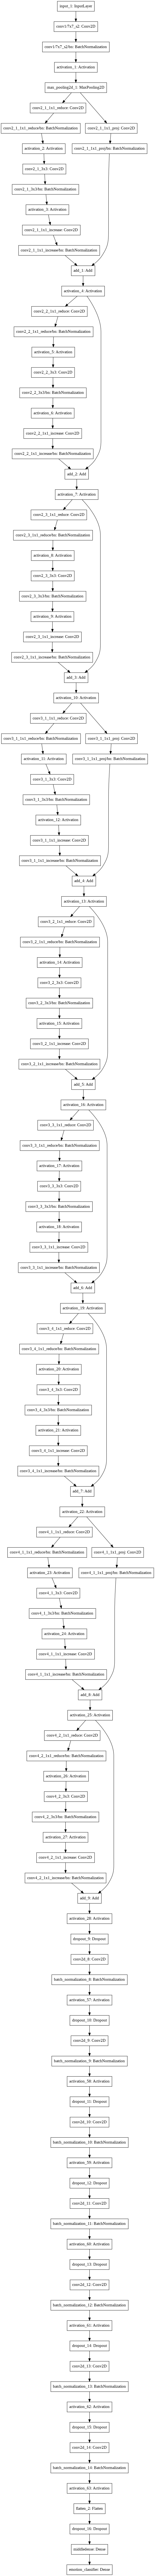

In [ ]:
from keras.utils import plot_model
plot_model(model_new, to_file='vggface_emotion.png')

In [ ]:
history = model_new.fit_generator(train_data_gen,
                    callbacks=callbacks,
                    steps_per_epoch=steps_per_epoch,
                    epochs=50,
                    validation_data=valid_data_gen,
                    validation_steps=validation_steps,
                    )




model_new.save("model_vggface_EMOTIONV4.hdf5")


Epoch 1/50
372/372 [==============================] - 307s 825ms/step - loss: 1.7575 - acc: 0.6827 - val_loss: 1.0597 - val_acc: 0.7323

Epoch 00001: val_loss improved from inf to 1.05965, saving model to weights_vggface_EMOTIONV4.01-0.73.hdf5
Epoch 2/50
372/372 [==============================] - 300s 806ms/step - loss: 0.9370 - acc: 0.7649 - val_loss: 0.9533 - val_acc: 0.7459

Epoch 00002: val_loss improved from 1.05965 to 0.95326, saving model to weights_vggface_EMOTIONV4.02-0.75.hdf5
Epoch 3/50
372/372 [==============================] - 299s 803ms/step - loss: 0.8779 - acc: 0.7729 - val_loss: 1.5636 - val_acc: 0.5482

Epoch 00003: val_loss did not improve from 0.95326

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/50
372/372 [==============================] - 305s 821ms/step - loss: 0.6563 - acc: 0.8160 - val_loss: 0.7513 - val_acc: 0.8079

Epoch 00004: val_loss improved from 0.95326 to 0.75134, saving model to weights_vggface_EMOTIONV4.04-

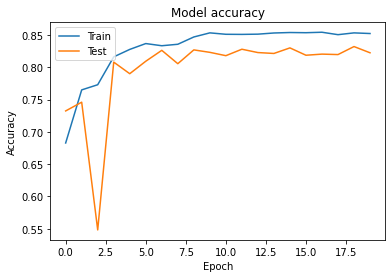

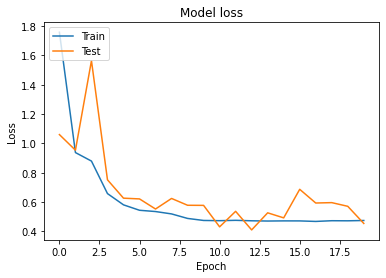

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model_new.load_weights("/content/weights_vggface_EMOTIONV4.13-0.82.hdf5")

In [ ]:
model_new.evaluate(test_data_gen)

47/47 [==============================] - 11s 234ms/step


[0.41758641600608826, 0.8134101033210754]

In [ ]:

pred = model_new.predict_generator(test_data_gen, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(valid_data_gen.labels, predicted)
print(report)

16/16 [==============================] - 6s 398ms/step
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       246
           1       0.52      0.64      0.57       238

    accuracy                           0.53       484
   macro avg       0.53      0.53      0.53       484
weighted avg       0.53      0.53      0.53       484



In [ ]:
pred = model_new.predict_generator(valid_data_gen, num_valid // BATCH_SIZE+1)
y_pred = np.argmax(pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_data_gen.labels, y_pred,normalize="true"))
print('Classification Report')
target_names = ['Angry', 'Happy', 'Neutral','Sad']
print(classification_report(valid_data_gen.classes, y_pred, target_names=target_names))